# About Data

A data frame with 53940 rows and 10 variables:

- price : price in US dollars ($326 - $18,823)

- carat : weight of the diamond (0.2--5.01)

- cut : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

- color : diamond colour, from J (worst) to D (best)

- clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

- x : length in mm (0--10.74)

- y : width in mm (0--58.9)

- z : depth in mm (0--31.8)

- depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

- table : width of top of diamond relative to widest point (43--95)



# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
import catboost

from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV



# Loading Data

In [2]:
data = pd.read_csv("/home/ilaf/Desktop/ML projects/DiamondPricePrediction/dataSource/diamonds.csv")

In [3]:
data.shape

(53940, 11)

In [4]:
data.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


# Data Preprocessing

- The first column is an index ("Unnamed: 0") and thus we are going to remove it.

In [5]:
data = data.drop(["Unnamed: 0"], axis=1)
data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


- There are no null values in data.
- There are 3 catgorical features in data and 7 continuous features in data.

In [7]:
data.describe(include = "all")

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


- There are 5 to 8 unique values in each categorical data.
- "carat" and "price" both seems to be right skewed distribution.
- "depth", "table", "x", "y" and "z" seems to be normal distibution.
- min price is 326 and max price is 18823.

In [8]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [9]:
data[data['carat'] == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [10]:
data[data['depth'] == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [11]:
data[data['table'] == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [12]:
data[data['price'] == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [13]:
data[data['x'] == 0].index

Int64Index([11182, 11963, 15951, 24520, 26243, 27429, 49556, 49557], dtype='int64')

In [14]:
data[data['y'] == 0].index

Int64Index([11963, 15951, 24520, 26243, 27429, 49556, 49557], dtype='int64')

In [15]:
data[data['z'] == 0].index

Int64Index([ 2207,  2314,  4791,  5471, 10167, 11182, 11963, 13601, 15951,
            24394, 24520, 26123, 26243, 27112, 27429, 27503, 27739, 49556,
            49557, 51506],
           dtype='int64')

In [16]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [17]:
data['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [18]:
data['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [19]:
data['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

- Even though there are no null values there are 20 data points where value of x, y, or z is 0(zero).
- These 20 data points are dimensionless(2-D or 1-D) diamonds.
- So, these dimonds data can be removed.

In [20]:
#Dropping dimentionless diamonds
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(53920, 10)

In [21]:
categorical_data = ['cut', 'color', 'clarity']
numerical_data = []
for col in data.columns:
    if col not in categorical_data:
        numerical_data.append(col)
numerical_data, categorical_data        

(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'],
 ['cut', 'color', 'clarity'])

# Exploratory Data Analysis

# Univariate Analysis

In [22]:
for col in numerical_data:
    print("Maximum of",col,max(data[col]))
    print("Minimum of",col,min(data[col]))
    print()

Maximum of carat 5.01
Minimum of carat 0.2

Maximum of depth 79.0
Minimum of depth 43.0

Maximum of table 95.0
Minimum of table 43.0

Maximum of price 18823
Minimum of price 326

Maximum of x 10.74
Minimum of x 3.73

Maximum of y 58.9
Minimum of y 3.68

Maximum of z 31.8
Minimum of z 1.07



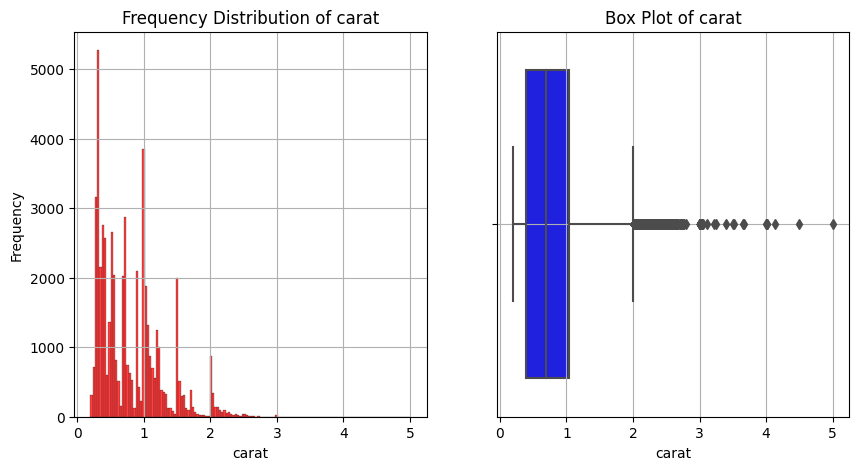

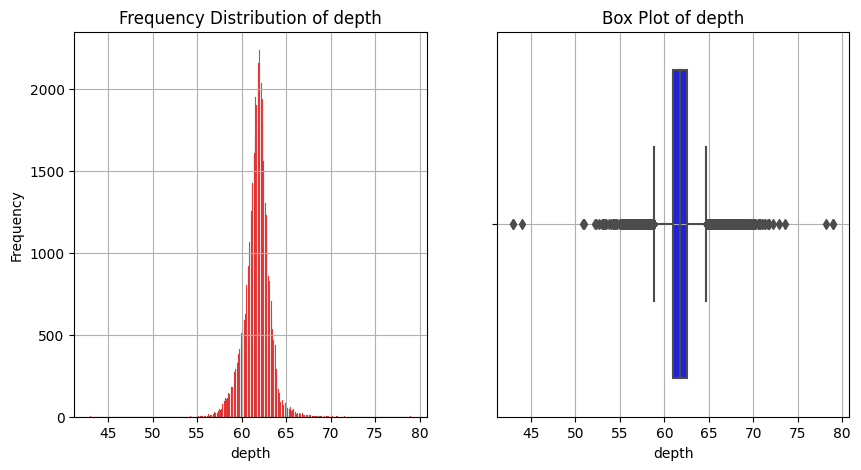

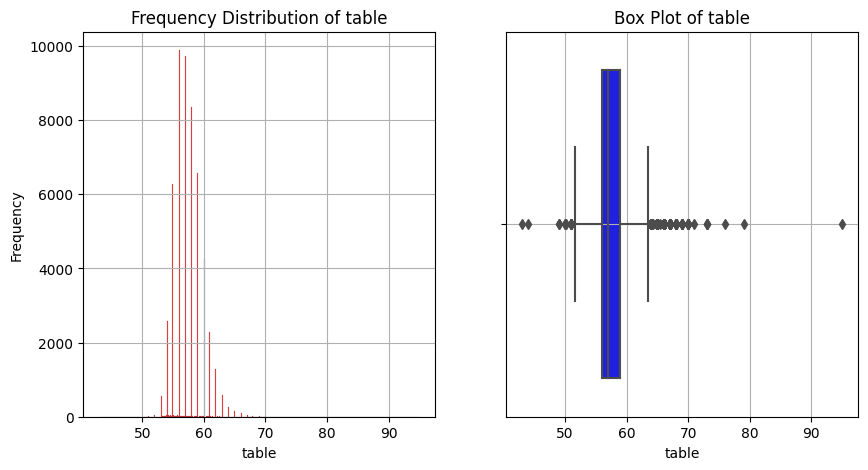

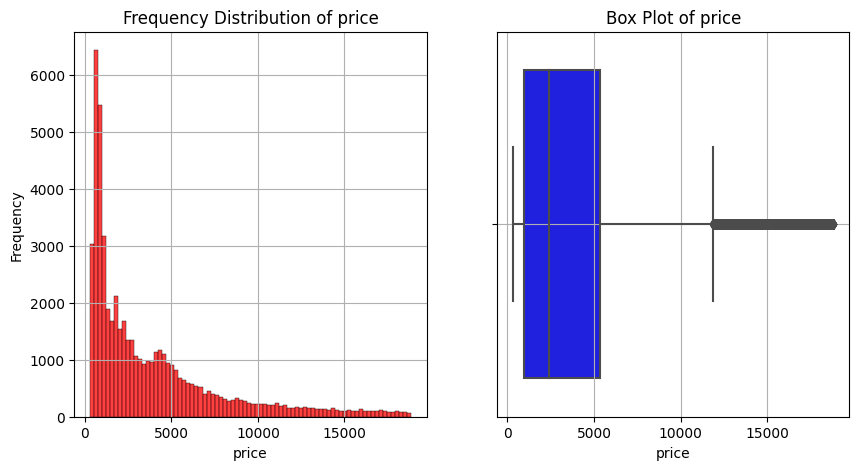

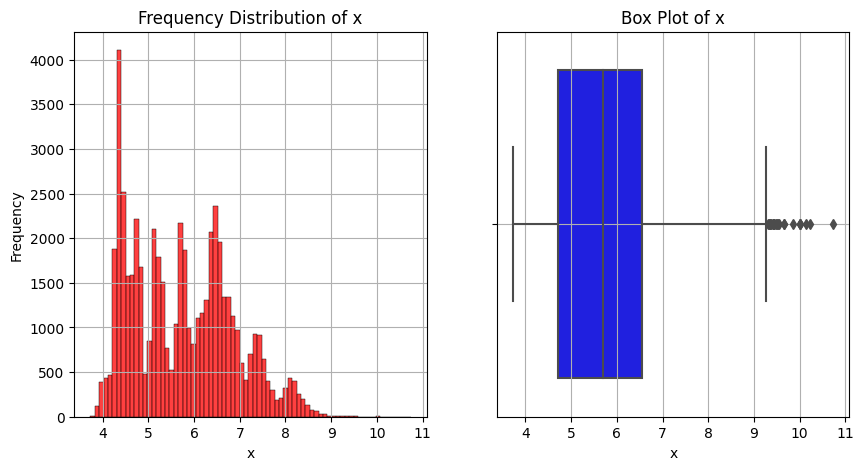

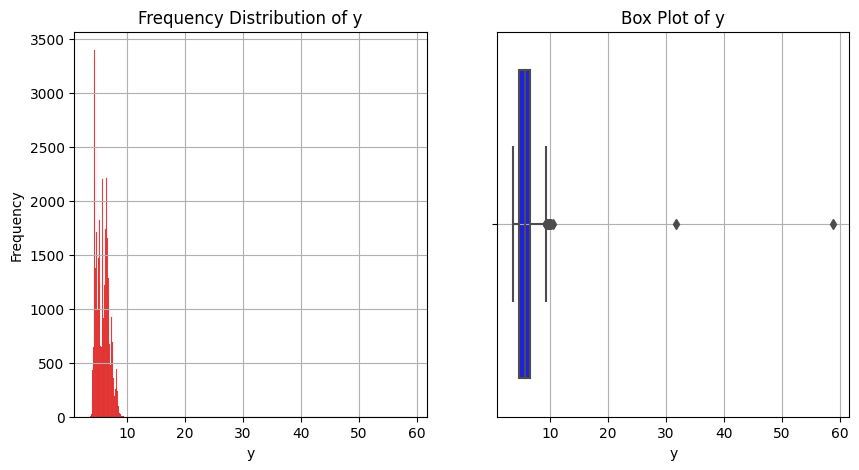

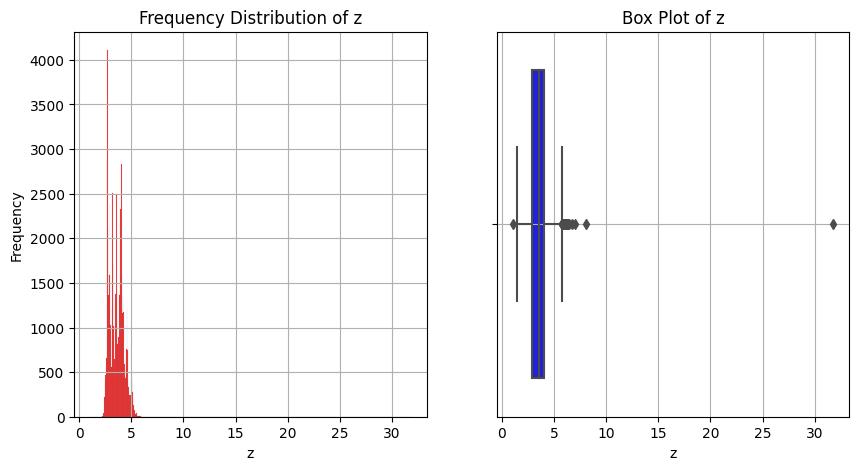

In [23]:
for col in numerical_data:
    plt.figure(figsize = [10,5])
    plt.subplot(1, 2, 1)
    plt.title("Frequency Distribution of {}".format(col))
    sns.histplot(data = data, x = col, color = "red", cbar = True)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid()
    plt.subplot(1, 2, 2)
    plt.title("Box Plot of {}".format(col))
    sns.boxplot(data = data, x = col, color = "blue")
    plt.grid()
    plt.show()

- As expected "carat" and "price" has right skewed distribution and others has normal distribution.


In [24]:
for col in categorical_data:
    print(data[col].value_counts())


Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64
G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: color, dtype: int64
SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: clarity, dtype: int64


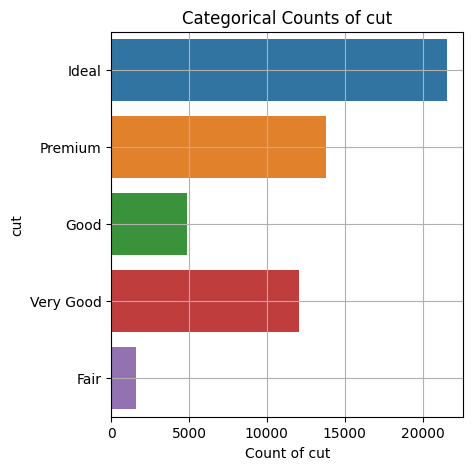

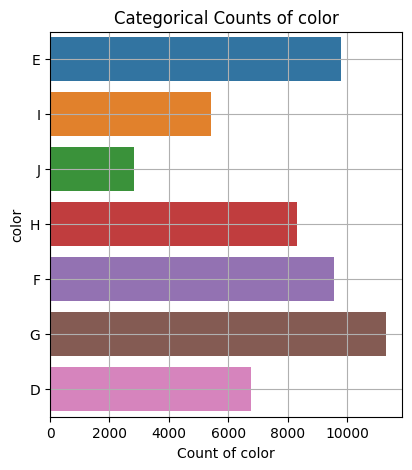

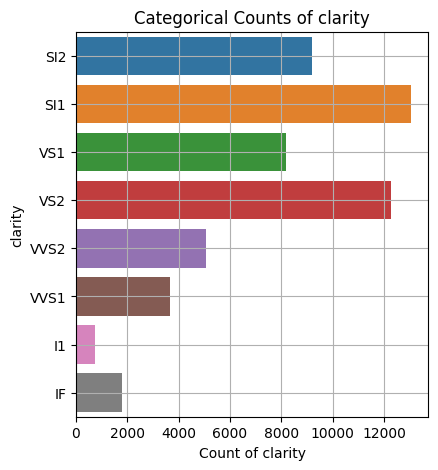

In [25]:
for col in categorical_data:
    plt.figure(figsize = [10,5])
    plt.subplot(1, 2, 1)
    plt.title("Categorical Counts of {}".format(col))
    sns.countplot(data = data, y = col)
    plt.xlabel("Count of {}".format(col))
    plt.ylabel(col)
    plt.grid()
    plt.show()

- ideal cut has maximum count while fair cut has least count.
- G type of color has max count and j type of color as min count.
- SI1 and I1 has maximum and minimum count respectively.

# Bivariate Analysis

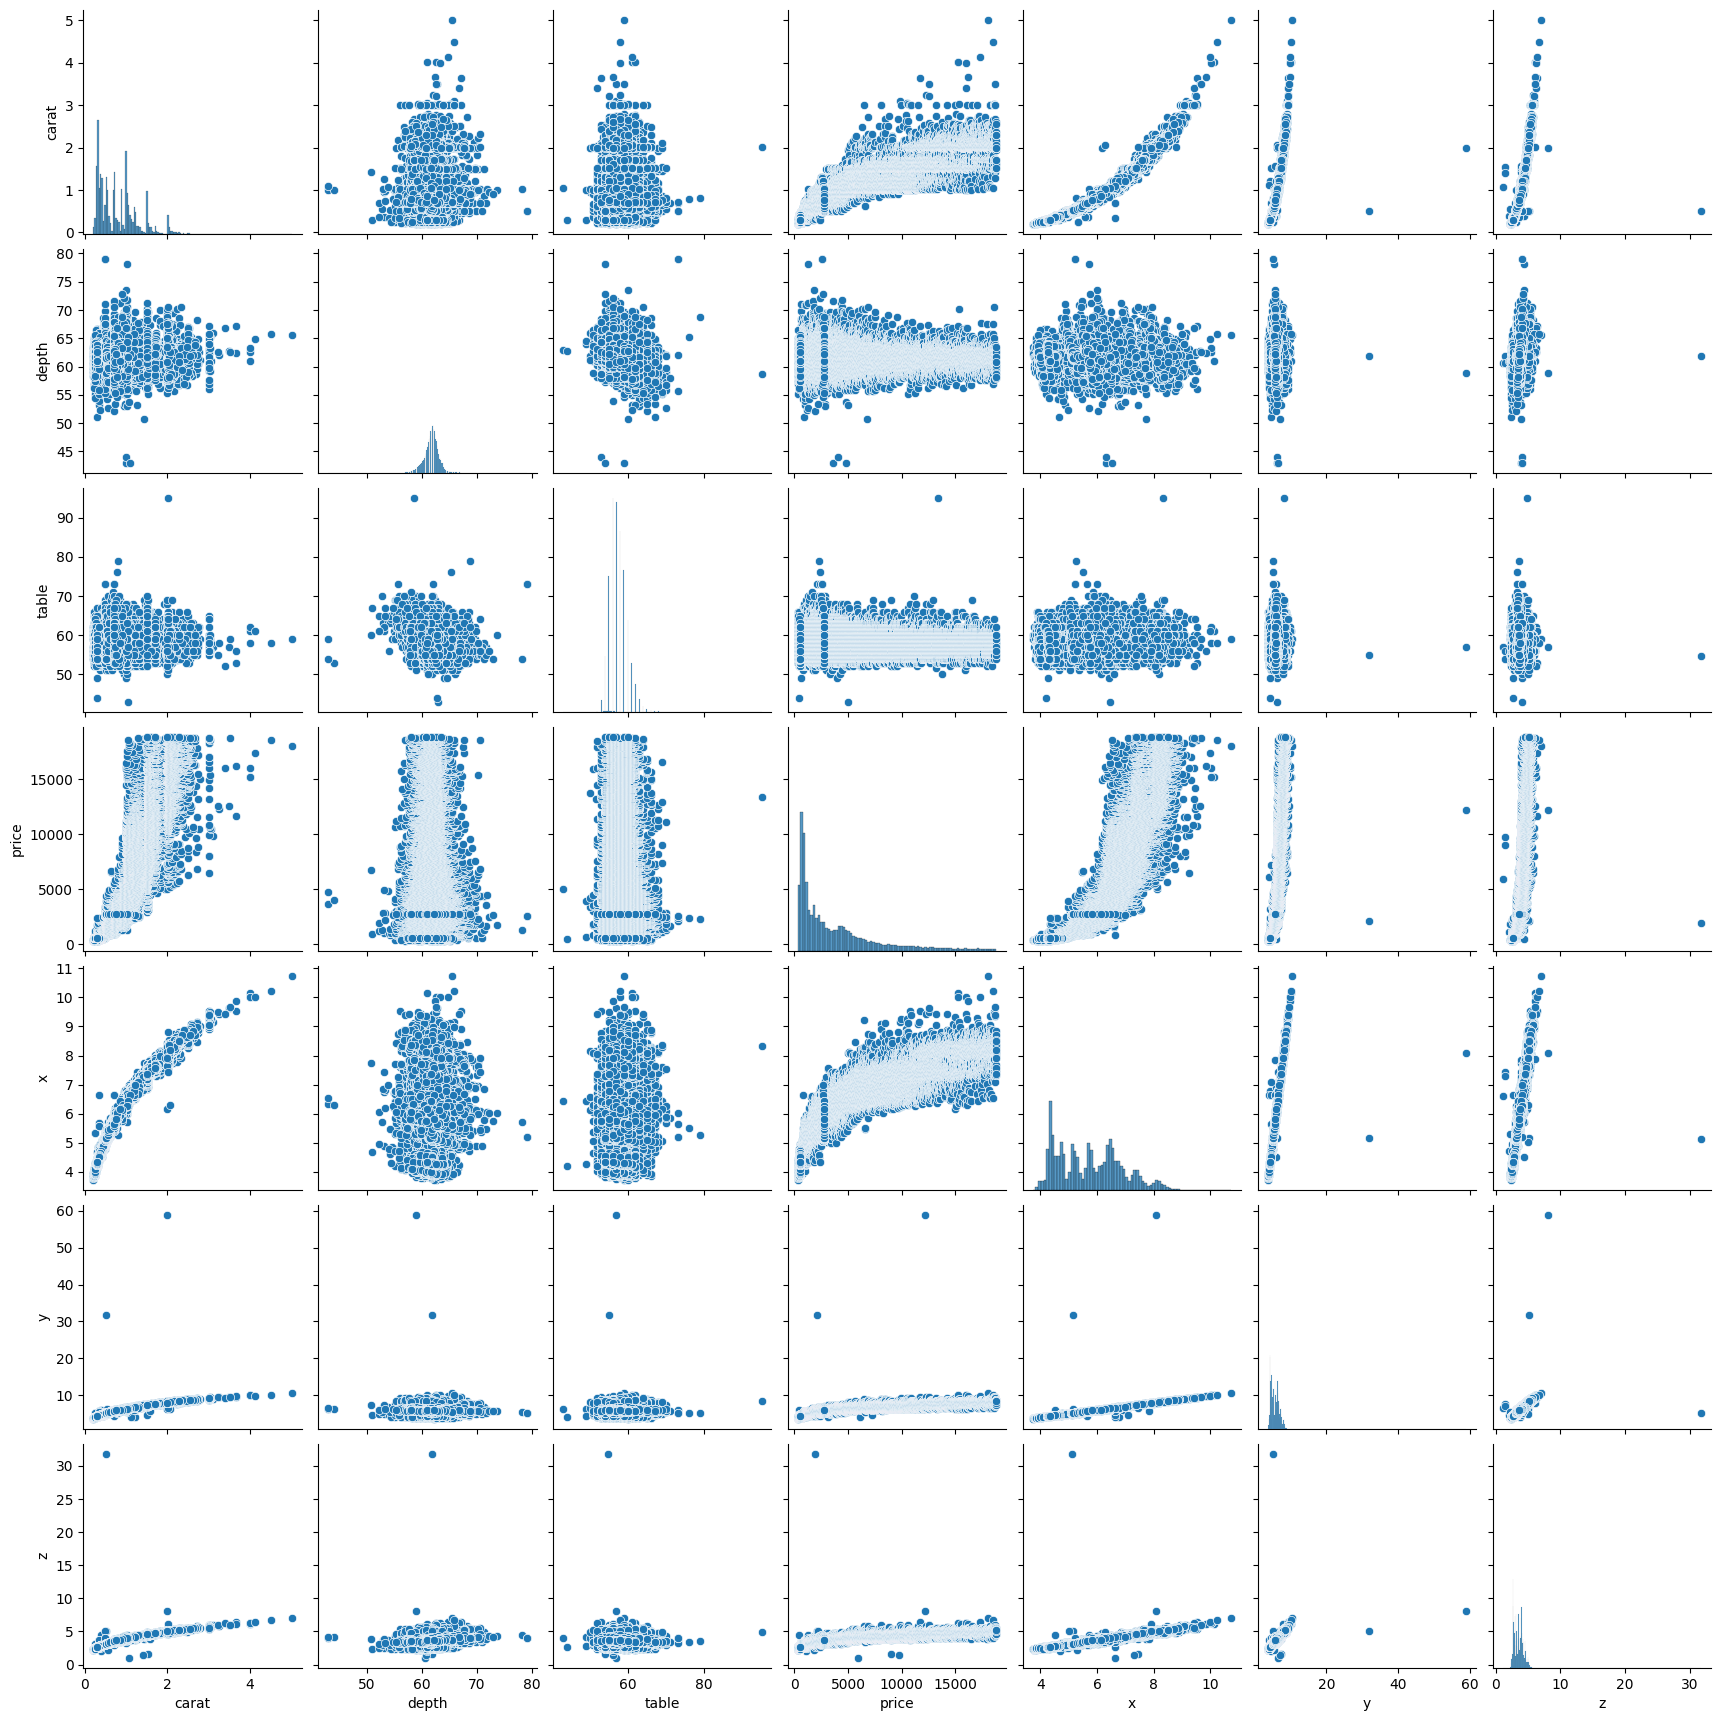

In [26]:
sns.pairplot(data)

<Axes: >

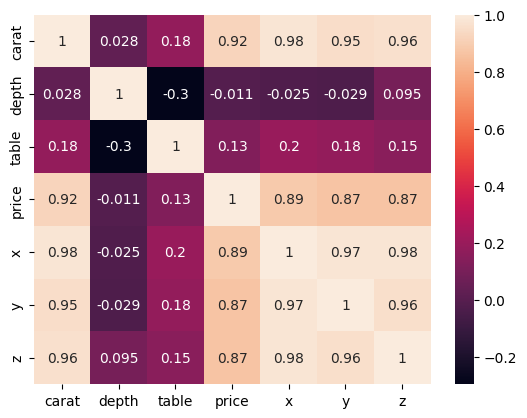

In [27]:
sns.heatmap(data.corr(), annot = True)

In [28]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

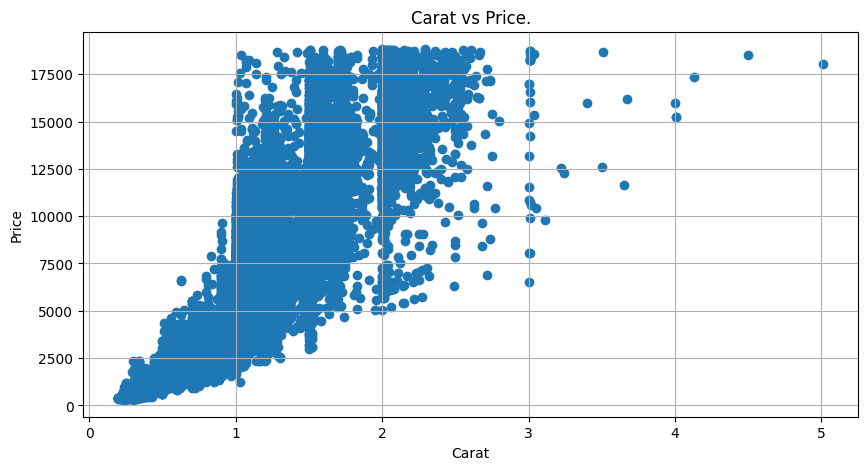

In [29]:
plt.figure(figsize =(10,5))
plt.scatter(data["carat"],data["price"])
plt.title("Carat vs Price.")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.grid()
plt.show()

- As Carat increases price also seems to increase

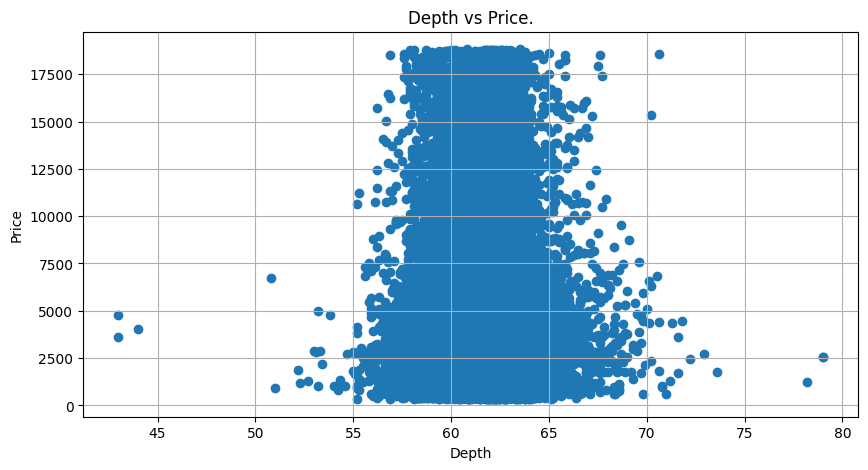

In [30]:
plt.figure(figsize =(10,5))
plt.scatter(data["depth"],data["price"])
plt.title("Depth vs Price.")
plt.xlabel("Depth")
plt.ylabel("Price")
plt.grid()
plt.show()

- Depth mostly ranges from 55 to 70 where price ranges from min value to max value.

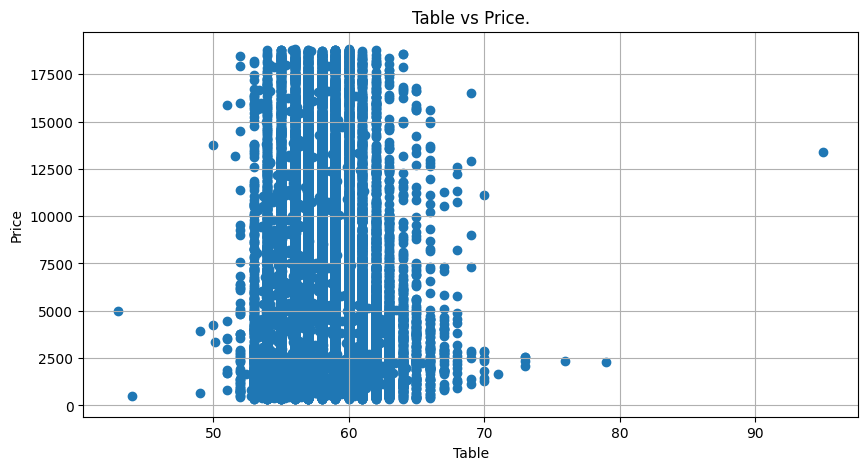

In [31]:
plt.figure(figsize =(10,5))
plt.scatter(data["table"],data["price"])
plt.title("Table vs Price.")
plt.xlabel("Table")
plt.ylabel("Price")
plt.grid()
plt.show()

- Table length ranges between 50 to 70 for all prices. 

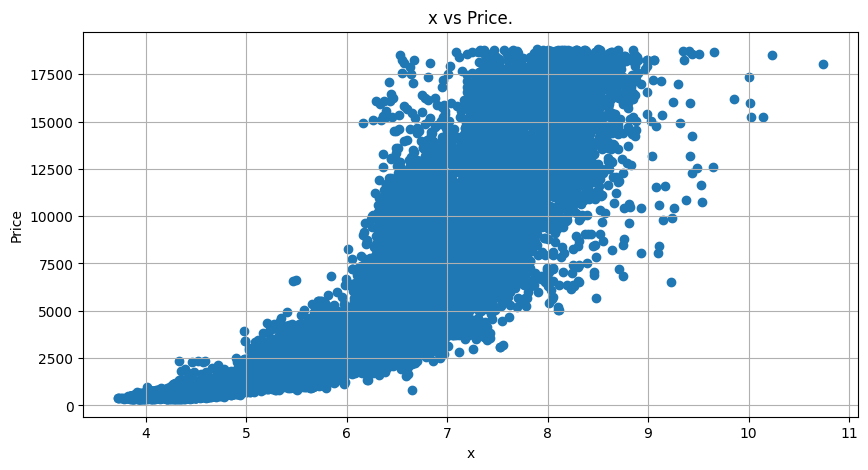

In [32]:
plt.figure(figsize =(10,5))
plt.scatter(data["x"],data["price"])
plt.title("x vs Price.")
plt.xlabel("x")
plt.ylabel("Price")
plt.grid()
plt.show()

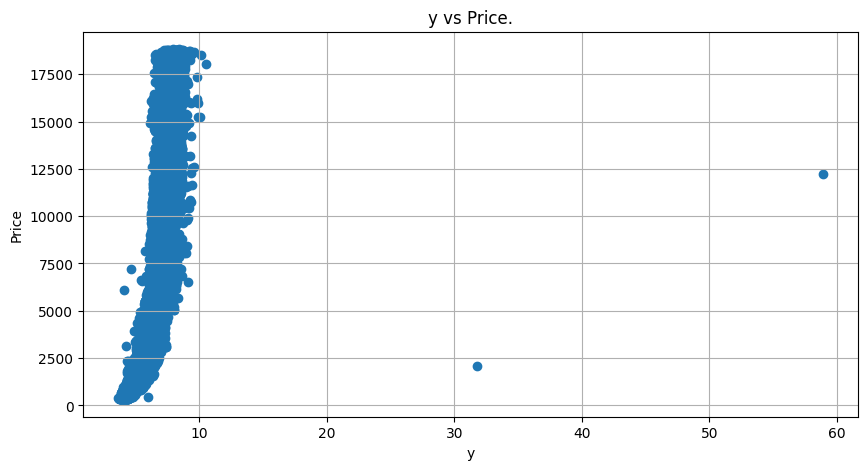

In [33]:
plt.figure(figsize =(10,5))
plt.scatter(data["y"],data["price"])
plt.title("y vs Price.")
plt.xlabel("y")
plt.ylabel("Price")
plt.grid()
plt.show()

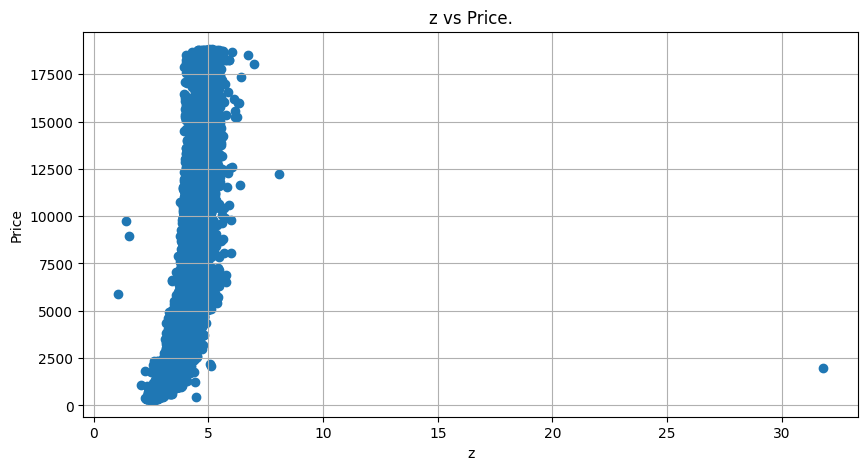

In [34]:
plt.figure(figsize =(10,5))
plt.scatter(data["z"],data["price"])
plt.title("z vs Price.")
plt.xlabel("z")
plt.ylabel("Price")
plt.grid()
plt.show()

- Value of x and prices are directly related to each other.
- For min to max prices value of y ranges between 0 - 10.

- For all prices value of z ranges between 0 - 5.  

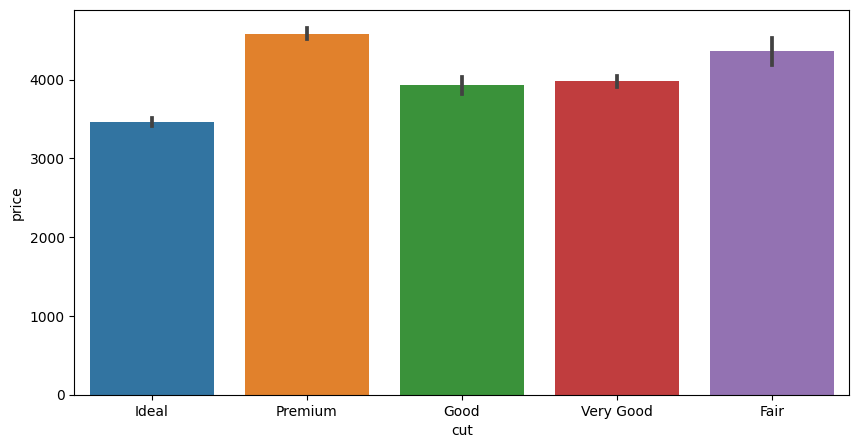

In [35]:
plt.figure(figsize =(10,5))
sns.barplot(data=data, x="cut", y="price")
plt.show()

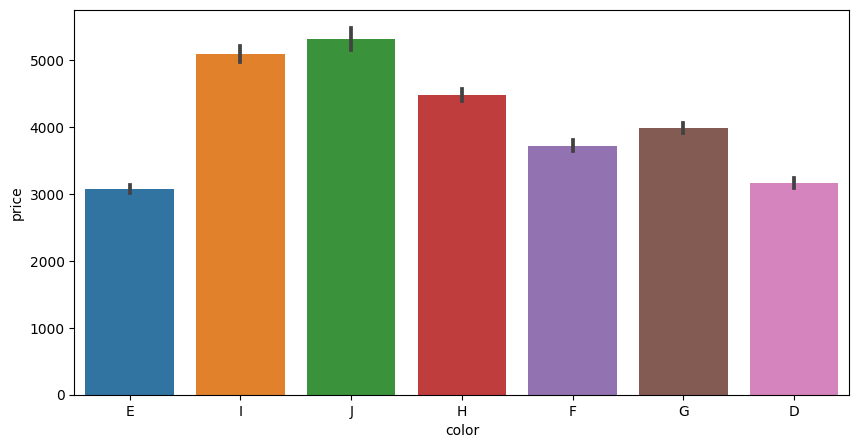

In [36]:
plt.figure(figsize =(10,5))
sns.barplot(data=data, x="color", y="price")
plt.show()

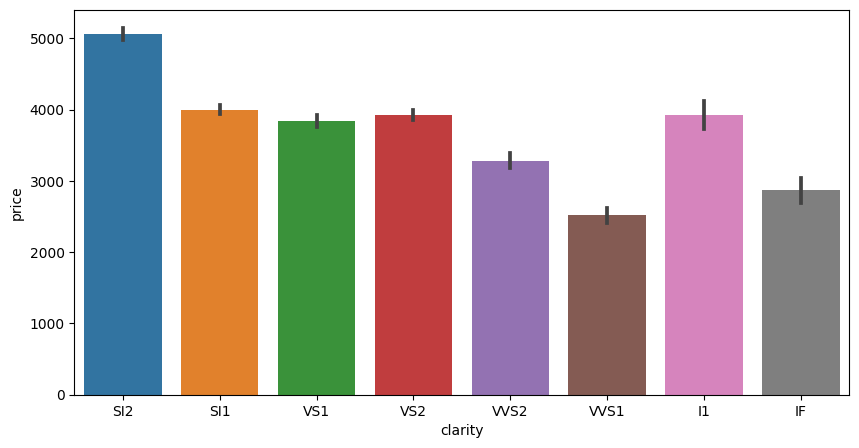

In [37]:
plt.figure(figsize =(10,5))
sns.barplot(data=data, x="clarity", y="price")
plt.show()

In [38]:
data.groupby(by = ['cut','color'])['price'].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4232.412141
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3498.761852
           G        4105.907940
           H        4276.254986
           I        5078.532567
           J        4574.172638
Ideal      D        2629.094566
           E        2597.550090
           F        3374.526536
           G        3718.469070
           H        3889.334831
           I        4451.970377
           J        4918.186384
Premium    D        3623.767790
           E        3538.914420
           F        4325.099571
           G        4502.207806
           H        5198.354140
           I        5939.557814
           J        6294.591584
Very Good  D        3470.467284
           E        3214.652083
           F        377

- For almost every cut the color 'j' is having the max mean price.

In [39]:
data.groupby(by = ['cut','clarity'])['price'].mean()

cut        clarity
Fair       I1         3703.533333
           IF         1912.333333
           SI1        4208.279412
           SI2        5173.916309
           VS1        4152.029586
           VS2        4174.724138
           VVS1       3871.352941
           VVS2       3349.768116
Good       I1         3584.694737
           IF         4098.323944
           SI1        3689.533333
           SI2        4571.627087
           VS1        3801.445988
           VS2        4262.236196
           VVS1       2254.774194
           VVS2       3079.108392
Ideal      I1         4335.726027
           IF         2272.913366
           SI1        3752.118169
           SI2        4755.876396
           VS1        3489.744497
           VS2        3282.223515
           VVS1       2468.129458
           VVS2       3250.290100
Premium    I1         3958.881773
           IF         3856.143478
           SI1        4448.621886
           SI2        5541.313859
           VS1        4485.46

-  For almost every cut the clarity 'SI2' is having the max mean price.

In [40]:
data.groupby(by = ['cut','color','clarity'])['price'].mean().sort_values(ascending =False).head(20)

cut        color  clarity
Very Good  D      IF         10298.260870
Good       D      IF         10030.333333
Ideal      J      I1          9454.000000
Premium    D      IF          9056.500000
           J      SI2         7550.285714
Fair       D      I1          7383.000000
Premium    J      VVS1        7244.375000
Ideal      I      SI2         7191.912409
Premium    I      VS2         7156.346032
                  SI2         7148.483974
           J      IF          7026.000000
Good       I      SI2         6933.012346
Premium    H      SI2         6685.753372
Fair       I      SI2         6658.022222
Very Good  I      SI2         6621.600000
Ideal      D      IF          6567.178571
           J      SI2         6555.172727
Premium    J      VVS2        6423.352941
                  VS2         6175.559406
Very Good  H      SI2         6112.413994
Name: price, dtype: float64

In [41]:
data.groupby(by = ['cut','color','clarity'])['price'].mean().sort_values(ascending =True).head(20)

cut        color  clarity
Very Good  J      IF         1074.125000
Premium    H      VVS1       1453.758929
Fair       G      IF         1488.000000
Ideal      I      IF         1502.621053
Good       E      IF         1519.222222
Fair       D      IF         1619.666667
           J      VVS1       1691.000000
Good       H      VVS1       1719.709677
           I      IF         1749.333333
Premium    I      VVS1       1831.083333
Good       E      VVS1       1905.953488
Ideal      H      VVS1       1915.984663
                  IF         1982.765487
Very Good  E      VVS1       1997.447059
Ideal      J      VVS1       2000.172414
           I      VVS1       2034.396648
Very Good  E      VVS2       2041.684564
           H      VVS1       2042.191304
           I      VVS1       2056.420290
Fair       E      I1         2095.222222
Name: price, dtype: float64

In [42]:
data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
depth,0.028259,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,0.181646,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,0.921592,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
x,0.977779,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
y,0.953991,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
z,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


# Encoding

In [43]:
categorical_data

['cut', 'color', 'clarity']

In [44]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [45]:
encoder = LabelEncoder()

for col in categorical_data:
    data[col] = encoder.fit_transform(data[col])

In [46]:
data.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [47]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


# Modelling

In [48]:
x = data.drop(['price'], axis = 1)
y = data["price"]

In [49]:
x_train ,x_test, y_train ,y_test = train_test_split(x,y, test_size = 0.2)

In [50]:
x_train.shape ,x_test.shape, y_train.shape ,y_test.shape

((43136, 9), (10784, 9), (43136,), (10784,))

In [51]:
regressor = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
knr = KNeighborsRegressor()
br = BaggingRegressor()
xgbr = xgb.XGBRegressor(objective ='reg:linear',
                        n_estimators = 10, seed = 123)
cbr = catboost.CatBoostRegressor(loss_function="RMSE")

In [52]:
regressor.fit(x_train,y_train)

LinearRegression()

In [53]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [54]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [55]:
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [56]:
br.fit(x_train,y_train)

BaggingRegressor()

In [57]:
xgbr.fit(x_train,y_train)

[11:05:16] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [58]:
cbr.fit(x_train,y_train)

Learning rate set to 0.074214
0:	learn: 3724.8545131	total: 144ms	remaining: 2m 23s
1:	learn: 3486.7647773	total: 173ms	remaining: 1m 26s
2:	learn: 3264.1547369	total: 192ms	remaining: 1m 3s
3:	learn: 3065.7530121	total: 202ms	remaining: 50.2s
4:	learn: 2879.0145853	total: 212ms	remaining: 42.2s
5:	learn: 2711.1439513	total: 223ms	remaining: 36.9s
6:	learn: 2548.7283087	total: 231ms	remaining: 32.8s
7:	learn: 2403.1979404	total: 240ms	remaining: 29.8s
8:	learn: 2269.3282870	total: 249ms	remaining: 27.4s
9:	learn: 2141.9106879	total: 256ms	remaining: 25.4s
10:	learn: 2027.5935187	total: 265ms	remaining: 23.8s
11:	learn: 1921.2235772	total: 274ms	remaining: 22.5s
12:	learn: 1820.5665031	total: 282ms	remaining: 21.4s
13:	learn: 1734.0301695	total: 289ms	remaining: 20.3s
14:	learn: 1650.7188705	total: 297ms	remaining: 19.5s
15:	learn: 1575.9270597	total: 306ms	remaining: 18.8s
16:	learn: 1504.0779137	total: 314ms	remaining: 18.2s
17:	learn: 1438.8282913	total: 322ms	remaining: 17.6s
18:	le

163:	learn: 548.4480782	total: 1.57s	remaining: 7.99s
164:	learn: 548.0447971	total: 1.57s	remaining: 7.97s
165:	learn: 547.6746612	total: 1.58s	remaining: 7.96s
166:	learn: 547.2574163	total: 1.59s	remaining: 7.94s
167:	learn: 546.5974706	total: 1.6s	remaining: 7.92s
168:	learn: 546.0848304	total: 1.61s	remaining: 7.91s
169:	learn: 545.5206166	total: 1.62s	remaining: 7.9s
170:	learn: 544.6443382	total: 1.63s	remaining: 7.89s
171:	learn: 544.0977717	total: 1.64s	remaining: 7.88s
172:	learn: 543.7407034	total: 1.65s	remaining: 7.87s
173:	learn: 543.4763600	total: 1.66s	remaining: 7.86s
174:	learn: 543.2571961	total: 1.67s	remaining: 7.85s
175:	learn: 542.5223545	total: 1.68s	remaining: 7.84s
176:	learn: 542.0643577	total: 1.68s	remaining: 7.82s
177:	learn: 541.2669424	total: 1.69s	remaining: 7.8s
178:	learn: 540.8468366	total: 1.7s	remaining: 7.79s
179:	learn: 540.6604068	total: 1.7s	remaining: 7.77s
180:	learn: 539.9191648	total: 1.71s	remaining: 7.76s
181:	learn: 539.5977581	total: 1.

337:	learn: 500.3462487	total: 2.99s	remaining: 5.85s
338:	learn: 500.2407244	total: 3s	remaining: 5.84s
339:	learn: 500.0895473	total: 3s	remaining: 5.83s
340:	learn: 499.8813006	total: 3.01s	remaining: 5.82s
341:	learn: 499.8223155	total: 3.02s	remaining: 5.81s
342:	learn: 499.7757450	total: 3.03s	remaining: 5.8s
343:	learn: 499.6660116	total: 3.04s	remaining: 5.79s
344:	learn: 499.4867246	total: 3.04s	remaining: 5.78s
345:	learn: 499.4559950	total: 3.05s	remaining: 5.77s
346:	learn: 499.1453939	total: 3.06s	remaining: 5.76s
347:	learn: 499.0278043	total: 3.07s	remaining: 5.74s
348:	learn: 498.8432664	total: 3.07s	remaining: 5.73s
349:	learn: 498.6182431	total: 3.08s	remaining: 5.72s
350:	learn: 498.5261170	total: 3.09s	remaining: 5.71s
351:	learn: 498.3078608	total: 3.1s	remaining: 5.7s
352:	learn: 498.0516960	total: 3.1s	remaining: 5.69s
353:	learn: 497.8636274	total: 3.11s	remaining: 5.68s
354:	learn: 497.5855960	total: 3.12s	remaining: 5.67s
355:	learn: 497.3883375	total: 3.13s	r

512:	learn: 475.2118943	total: 4.41s	remaining: 4.18s
513:	learn: 475.0522770	total: 4.41s	remaining: 4.17s
514:	learn: 474.8502618	total: 4.42s	remaining: 4.17s
515:	learn: 474.7507497	total: 4.43s	remaining: 4.16s
516:	learn: 474.6773989	total: 4.44s	remaining: 4.15s
517:	learn: 474.5601309	total: 4.45s	remaining: 4.14s
518:	learn: 474.4340426	total: 4.46s	remaining: 4.13s
519:	learn: 474.3191234	total: 4.46s	remaining: 4.12s
520:	learn: 474.2413532	total: 4.47s	remaining: 4.11s
521:	learn: 474.0446731	total: 4.48s	remaining: 4.1s
522:	learn: 473.9890400	total: 4.49s	remaining: 4.09s
523:	learn: 473.8701466	total: 4.49s	remaining: 4.08s
524:	learn: 473.7075504	total: 4.5s	remaining: 4.07s
525:	learn: 473.5742795	total: 4.51s	remaining: 4.06s
526:	learn: 473.4888976	total: 4.52s	remaining: 4.05s
527:	learn: 473.3377790	total: 4.53s	remaining: 4.05s
528:	learn: 473.1710920	total: 4.53s	remaining: 4.04s
529:	learn: 473.0892624	total: 4.54s	remaining: 4.03s
530:	learn: 472.9477643	total:

686:	learn: 457.6155737	total: 5.8s	remaining: 2.64s
687:	learn: 457.5158440	total: 5.81s	remaining: 2.63s
688:	learn: 457.4490850	total: 5.82s	remaining: 2.63s
689:	learn: 457.3625187	total: 5.82s	remaining: 2.62s
690:	learn: 457.2733947	total: 5.83s	remaining: 2.61s
691:	learn: 457.2316639	total: 5.84s	remaining: 2.6s
692:	learn: 457.1400144	total: 5.84s	remaining: 2.59s
693:	learn: 457.0550182	total: 5.85s	remaining: 2.58s
694:	learn: 456.9326854	total: 5.86s	remaining: 2.57s
695:	learn: 456.9151979	total: 5.87s	remaining: 2.56s
696:	learn: 456.8833262	total: 5.88s	remaining: 2.55s
697:	learn: 456.7492866	total: 5.88s	remaining: 2.54s
698:	learn: 456.6159268	total: 5.89s	remaining: 2.54s
699:	learn: 456.5383158	total: 5.9s	remaining: 2.53s
700:	learn: 456.4610189	total: 5.91s	remaining: 2.52s
701:	learn: 456.4195632	total: 5.92s	remaining: 2.51s
702:	learn: 456.3533624	total: 5.92s	remaining: 2.5s
703:	learn: 456.2832883	total: 5.93s	remaining: 2.49s
704:	learn: 456.1969657	total: 5

844:	learn: 445.5165101	total: 7.47s	remaining: 1.37s
845:	learn: 445.4199011	total: 7.49s	remaining: 1.36s
846:	learn: 445.3616470	total: 7.5s	remaining: 1.35s
847:	learn: 445.3014719	total: 7.5s	remaining: 1.34s
848:	learn: 445.2393787	total: 7.52s	remaining: 1.34s
849:	learn: 445.1973747	total: 7.53s	remaining: 1.33s
850:	learn: 445.1149461	total: 7.55s	remaining: 1.32s
851:	learn: 445.0655352	total: 7.57s	remaining: 1.31s
852:	learn: 445.0041778	total: 7.59s	remaining: 1.31s
853:	learn: 444.8659823	total: 7.61s	remaining: 1.3s
854:	learn: 444.8585004	total: 7.62s	remaining: 1.29s
855:	learn: 444.7473419	total: 7.64s	remaining: 1.28s
856:	learn: 444.7342189	total: 7.67s	remaining: 1.28s
857:	learn: 444.6594490	total: 7.69s	remaining: 1.27s
858:	learn: 444.5779377	total: 7.72s	remaining: 1.27s
859:	learn: 444.4583844	total: 7.75s	remaining: 1.26s
860:	learn: 444.4331148	total: 7.75s	remaining: 1.25s
861:	learn: 444.3853529	total: 7.76s	remaining: 1.24s
862:	learn: 444.3013785	total: 

In [59]:
predictions_reg_train = regressor.predict(x_train)
predictions_dtr_train = dtr.predict(x_train)
predictions_rfr_train = rfr.predict(x_train)
predictions_knr_train = knr.predict(x_train)
predictions_br_train = br.predict(x_train)
predictions_xgbr_train = xgbr.predict(x_train)
predictions_cbr_train = cbr.predict(x_train)

In [60]:
predictions_reg = regressor.predict(x_test)
predictions_dtr = dtr.predict(x_test)
predictions_rfr = rfr.predict(x_test)
predictions_knr = knr.predict(x_test)
predictions_br = br.predict(x_test)
predictions_xgbr = xgbr.predict(x_test)
predictions_cbr = cbr.predict(x_test)

In [61]:
results_train_df = pd.DataFrame({"Actual_Data_train":y_train,
              "reg_predictions_train":predictions_reg_train,
              "dtr_predictions_train":predictions_dtr_train,
              "rfr_predictions_train":predictions_rfr_train,
              "knr_predictions_train":predictions_knr_train,
              "br_predictions_train":predictions_br_train,
               "xgbr_predictions_train":predictions_xgbr_train,
              "cbr_predictions_train":predictions_cbr_train})

In [62]:
results_train_df.head(25)

,Actual_Data_train,reg_predictions_train,dtr_predictions_train,rfr_predictions_train,knr_predictions_train,br_predictions_train,xgbr_predictions_train,cbr_predictions_train
39935,492,1370.027103,492.0,501.5100,526.8,502.0,551.528748,561.363863
33429,828,292.322532,828.0,816.2325,718.2,828.0,697.955811,786.736706
48764,2017,3971.642331,2017.0,2134.5800,2342.0,2104.5,2384.650146,2321.347974
29848,710,1133.018279,710.0,707.7500,766.2,708.4,721.330444,740.057021
28581,675,142.980013,675.0,671.1800,754.8,675.0,659.267517,674.516350
47936,1915,2424.846652,1915.0,1880.1900,1795.0,1929.9,1894.518555,1900.921086
39911,1104,1595.590666,1104.0,1090.3000,1121.4,1093.9,1073.879761,1082.520932
32698,802,874.793052,802.0,796.8400,744.6,790.9,706.921814,712.401876
47114,1828,1957.482867,1828.0,1771.3200,2218.6,1706.9,1743.753784,1856.314664
50915,2318,3138.324555,2318.0,2377.6500,2464.8,2355.3,2431.547607,2504.174653


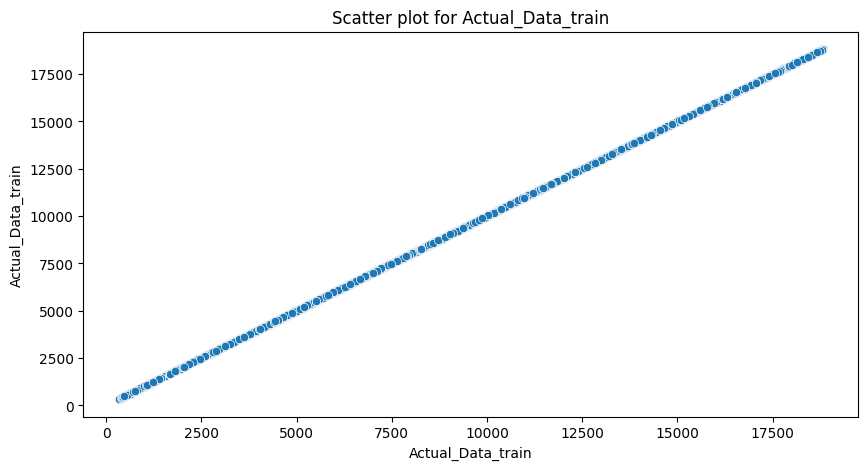

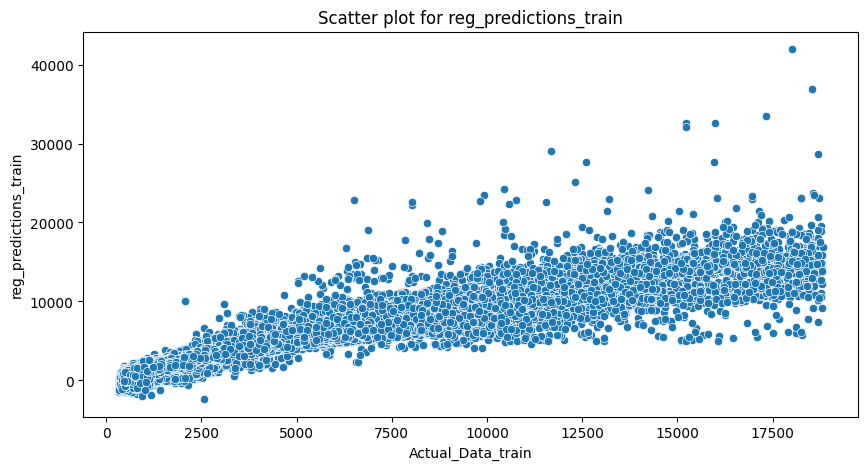

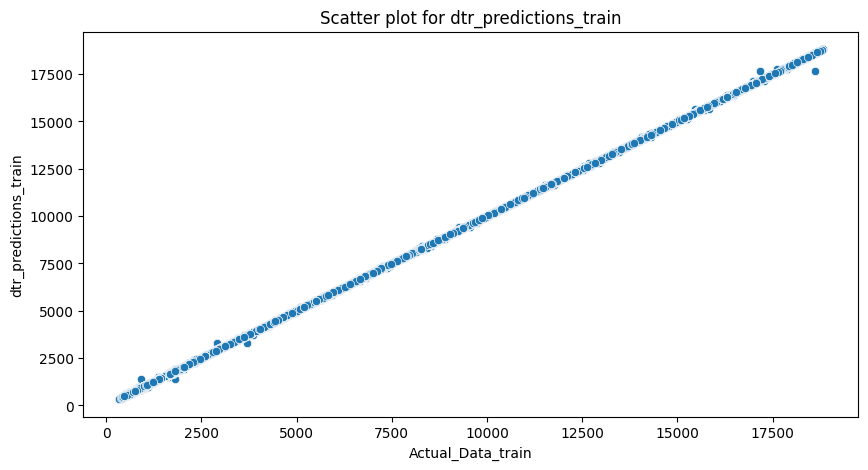

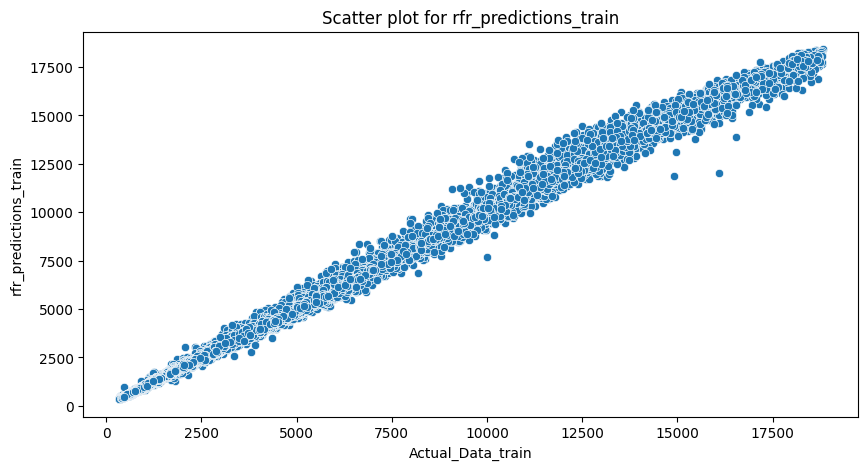

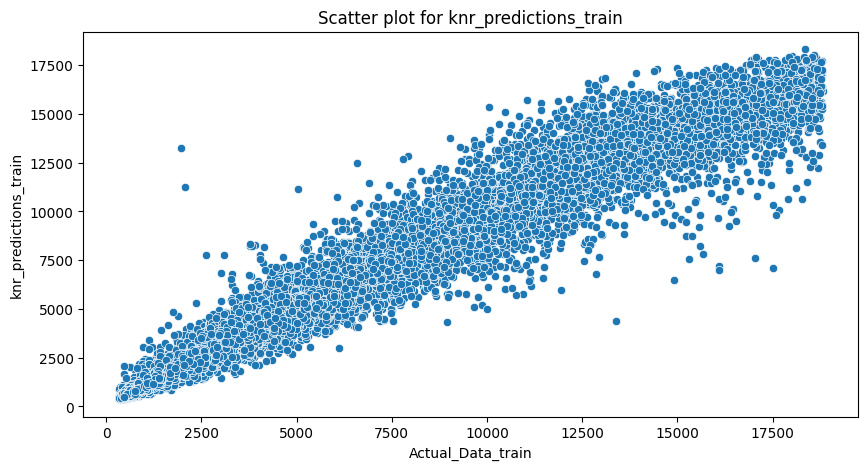

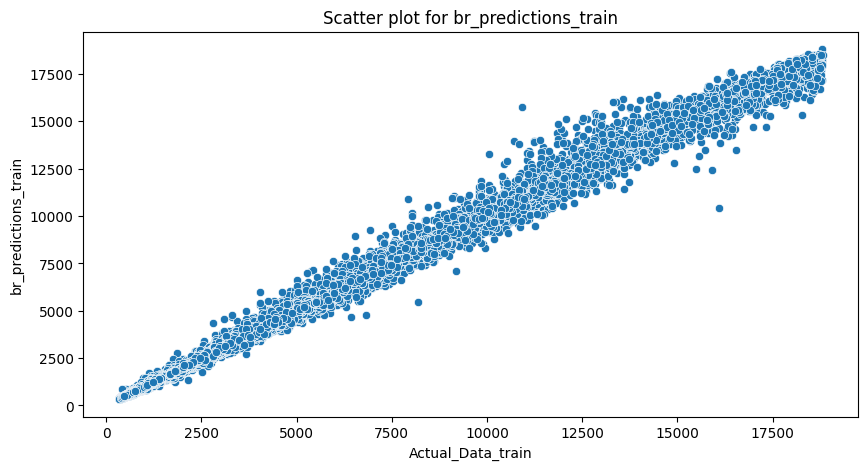

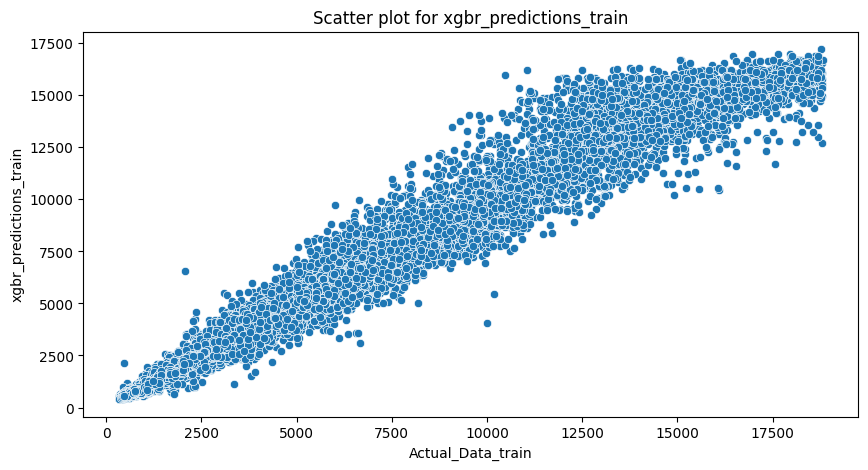

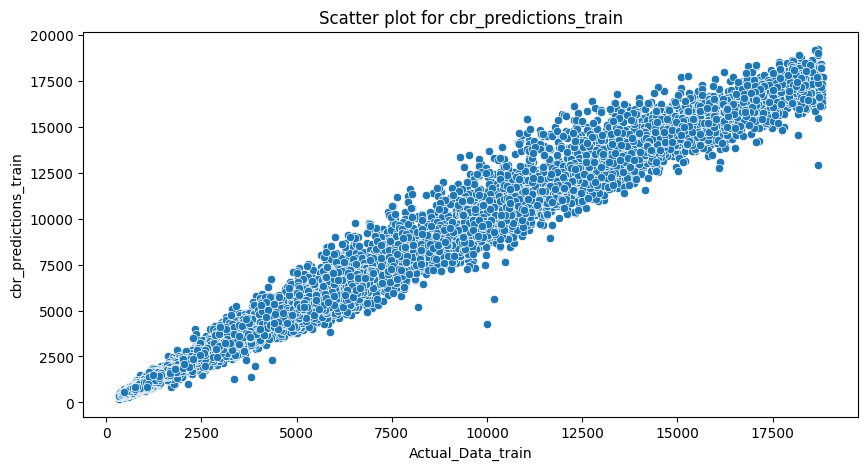

In [63]:
for col in results_train_df.columns:
    plt.figure(figsize = [10,5])
    plt.title("Scatter plot for {}".format(col))
    sns.scatterplot(x = results_train_df["Actual_Data_train"], y = results_train_df[col])
    plt.show()

In [64]:
results_df = pd.DataFrame({"Actual_Data":y_test,
              "reg_predictions":predictions_reg,
              "dtr_predictions":predictions_dtr,
              "rfr_predictions":predictions_rfr,
              "knr_predictions":predictions_knr,
              "br_predictions":predictions_br,
               "xgbr_predictions":predictions_xgbr,
              "cbr_predictions":predictions_cbr})

In [65]:
results_df.head(20)

,Actual_Data,reg_predictions,dtr_predictions,rfr_predictions,knr_predictions,br_predictions,xgbr_predictions,cbr_predictions
47704,1884,2795.699952,1984.0,1799.040000,1900.0,1868.8,1888.509521,1982.166675
34051,851,53.243137,663.0,810.600000,665.6,851.1,764.775513,675.745848
51009,2327,3022.422579,2167.0,2316.320000,2325.4,2305.5,2494.854980,2500.667848
22322,10365,10217.072344,9694.0,9754.945000,9815.6,9814.5,9665.446289,10679.824055
52034,2450,2943.786755,2137.0,2394.800000,2392.8,2390.7,2350.760254,2316.858825
21646,9738,7613.659601,9574.0,8872.130000,8742.2,8776.6,8631.483398,9023.363154
12338,5226,6390.199765,4612.0,4792.366667,4672.6,4839.6,5132.577148,5041.807088
46636,526,546.855639,556.0,536.590000,623.6,562.5,607.168823,623.518221
47173,1836,2252.459562,1784.0,1841.970000,1768.2,1855.0,1750.156982,1788.395285
45772,1707,2617.682436,1743.0,1741.960000,1730.6,1745.4,1724.559692,1882.387313


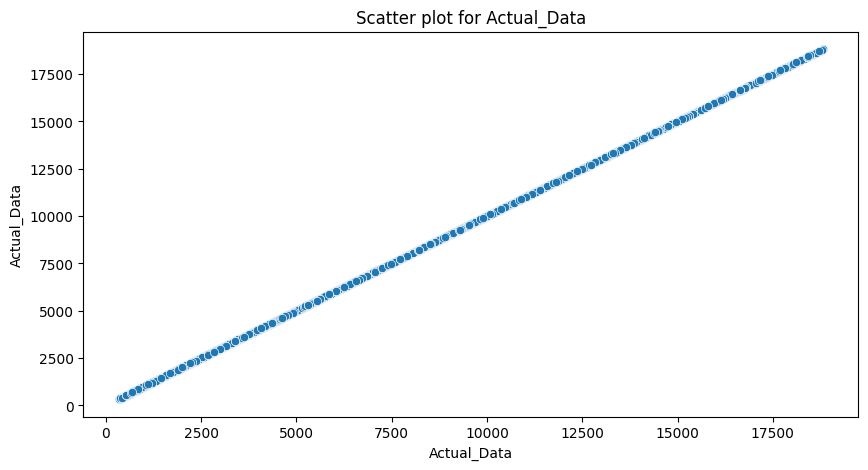

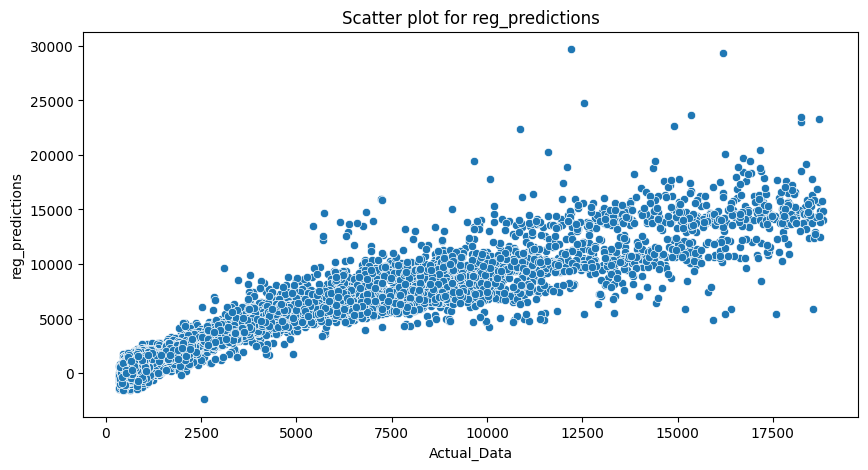

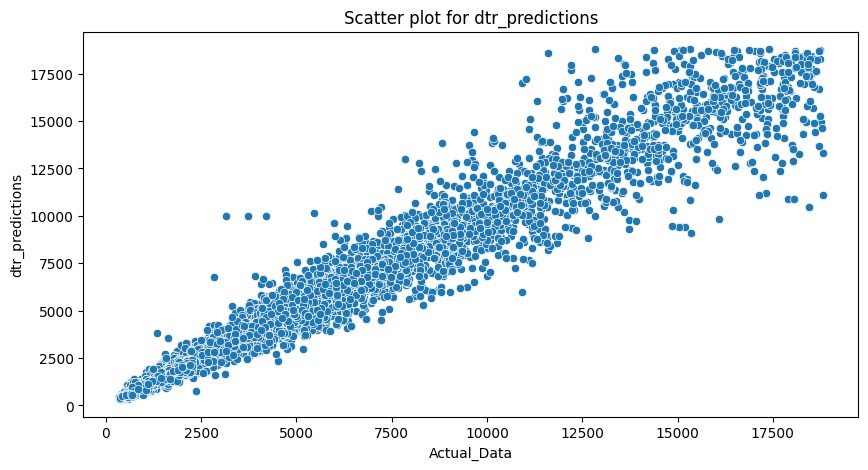

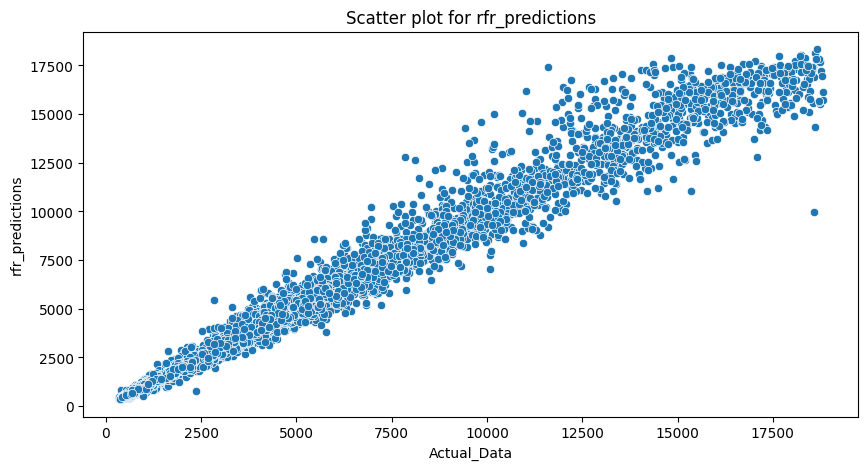

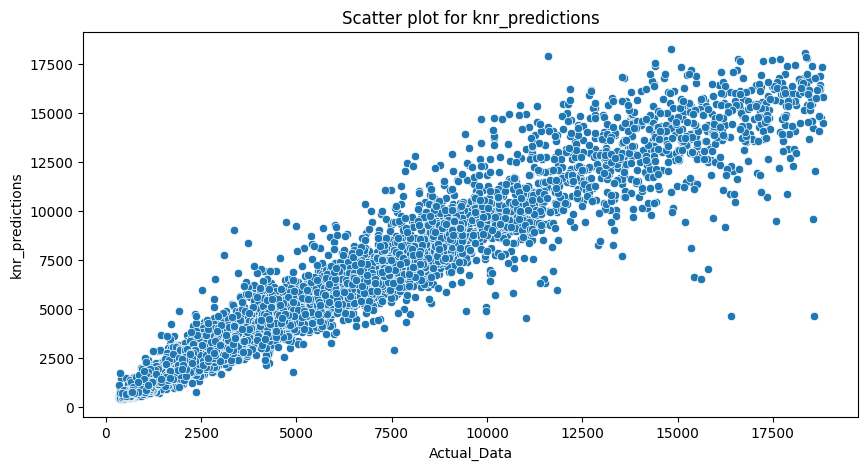

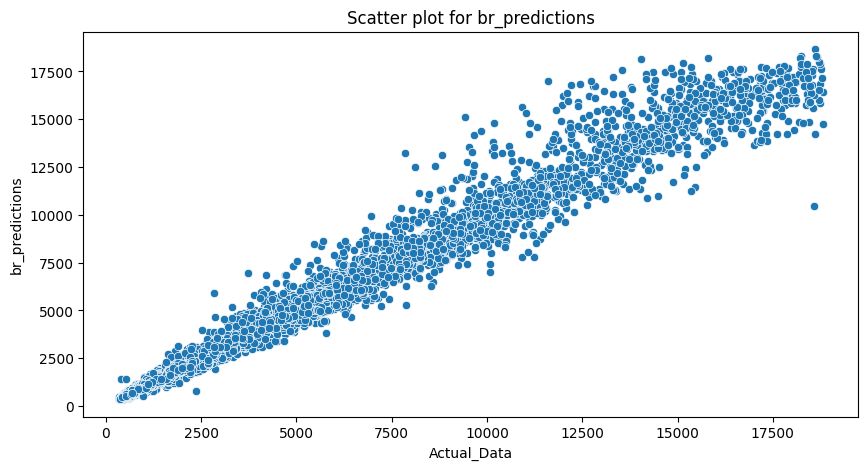

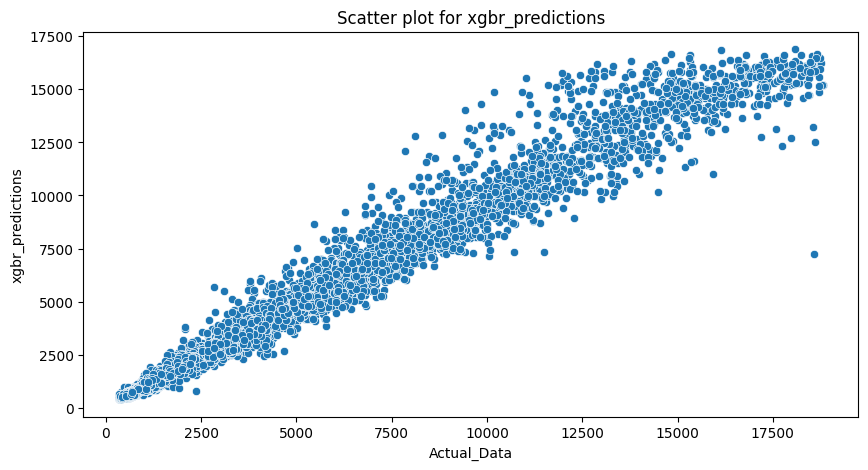

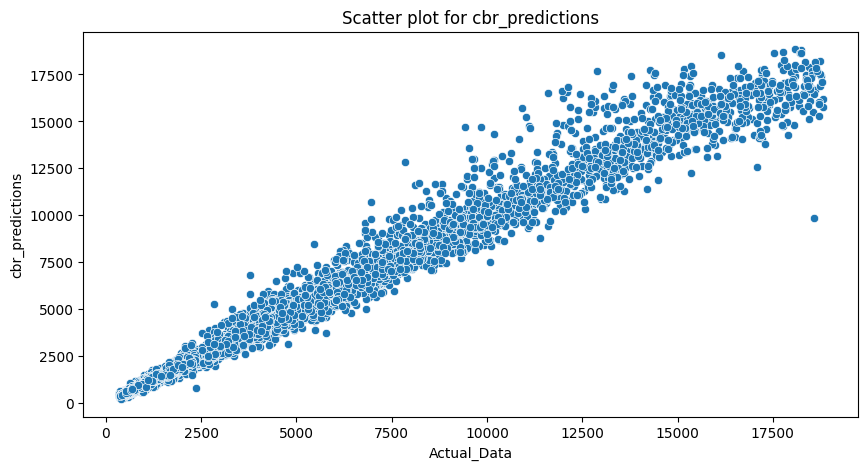

In [66]:
# results_df.columns

# plt.figure(figsize = [10,5])
#     plt.subplot(1, 2, 1)
#     plt.title("Frequency Distribution of {}".format(col))
#     sns.histplot(data = data, x = col, color = "red", cbar = True)
#     plt.xlabel(col)
#     plt.ylabel("Frequency")
#     plt.grid()
#     plt.subplot(1, 2, 2)
#     plt.title("Box Plot of {}".format(col))
#     sns.boxplot(data = data, x = col, color = "blue")
#     plt.grid()
#     plt.show()

# results_df
for col in results_df.columns:
    plt.figure(figsize = [10,5])
    plt.title("Scatter plot for {}".format(col))
    sns.scatterplot(x = results_df["Actual_Data"], y = results_df[col])
    plt.show()

In [67]:
reg_train = r2_score(results_train_df["Actual_Data_train"],results_train_df["reg_predictions_train"])*100
reg_test= r2_score(results_df["Actual_Data"],results_df["reg_predictions"])*100

dtr_train = r2_score(results_train_df["Actual_Data_train"],results_train_df["dtr_predictions_train"])*100
dtr_test= r2_score(results_df["Actual_Data"],results_df["dtr_predictions"])*100

rfr_train = r2_score(results_train_df["Actual_Data_train"],results_train_df["rfr_predictions_train"])*100
rfr_test= r2_score(results_df["Actual_Data"],results_df["rfr_predictions"])*100

knr_train = r2_score(results_train_df["Actual_Data_train"],results_train_df["knr_predictions_train"])*100
knr_test= r2_score(results_df["Actual_Data"],results_df["knr_predictions"])*100

br_train = r2_score(results_train_df["Actual_Data_train"],results_train_df["br_predictions_train"])*100
br_test= r2_score(results_df["Actual_Data"],results_df["br_predictions"])*100

xgbr_train = r2_score(results_train_df["Actual_Data_train"],results_train_df["xgbr_predictions_train"])*100
xgbr_test= r2_score(results_df["Actual_Data"],results_df["xgbr_predictions"])*100

cbr_train = r2_score(results_train_df["Actual_Data_train"],results_train_df["cbr_predictions_train"])*100
cbr_test= r2_score(results_df["Actual_Data"],results_df["cbr_predictions"])*100


In [68]:
scores_df = pd.DataFrame({"Model": ["regressor", "dtr", "rfr", "knr", "br", "xgbr",  "cbr",],
                          "train_score":  [reg_train, dtr_train, rfr_train, knr_train, br_train, xgbr_train, cbr_train],
                          "test_score" : [reg_test, dtr_test, rfr_test, knr_test, br_test, xgbr_test, cbr_test]})

In [69]:
scores_df

,Model,train_score,test_score
0,regressor,88.545611,88.439162
1,dtr,99.999503,96.444241
2,rfr,99.738604,98.072028
3,knr,96.644638,94.750086
4,br,99.625333,97.847013
5,xgbr,97.715654,97.366087
6,cbr,98.804029,98.149971


- above scores shows r2 score for different models on train and test data
